In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import mne
from autoreject import AutoReject


In [ ]:
subject = '1_MB'
df = pd.read_csv(f"./datasets/{subject}/{subject}_5.csv")

In [91]:
for idx in range(8):
    column = f" EXG Channel {idx}"
    df[column] = (df[column] - df[column].mean()) / df[column].std()     
  

In [92]:
# start = 8900

# # Using Numpy to create an array X
# X = np.array(df[' Timestamp'][start:])

# # Plotting both the curves simultaneously
# plt.plot(X, df[' EXG Channel 0'][start:], color='r', label='0')
# plt.plot(X, df[' EXG Channel 1'][start:], color='g', label='1')
# # plt.plot(X, df[' EXG Channel 2'][start:], color='b', label='2')
# # plt.plot(X, df[' EXG Channel 3'][start:], color='c', label='3')
# # plt.plot(X, df[' EXG Channel 4'][start:], color='m', label='4')
# # plt.plot(X, df[' EXG Channel 5'][start:], color='y', label='5')
# # plt.plot(X, df[' EXG Channel 6'][start:], color='coral', label='6')
# # plt.plot(X, df[' EXG Channel 7'][start:], color='k', label='7')

# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("time")
# plt.ylabel("bzzt")
# plt.title("channels")

# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend()

# # To load the display window
# plt.show()

In [93]:
# start = 5

# # Using Numpy to create an array X
# X = np.array(df[' Timestamp'][start:])

# # Assign variables to the y axis part of the curve
# y = np.array(df[' EXG Channel 0'][start:])
# z = np.array(df[' EXG Channel 1'][start:])

# # Plotting both the curves simultaneously
# plt.plot(X, df[' EXG Channel 0'][start:], color='r', label='0')
# plt.plot(X, df[' EXG Channel 1'][start:], color='g', label='1')
# plt.plot(X, df[' EXG Channel 2'][start:], color='b', label='2')
# plt.plot(X, df[' EXG Channel 3'][start:], color='c', label='3')
# plt.plot(X, df[' EXG Channel 4'][start:], color='m', label='4')
# plt.plot(X, df[' EXG Channel 5'][start:], color='y', label='5')
# plt.plot(X, df[' EXG Channel 6'][start:], color='coral', label='6')
# plt.plot(X, df[' EXG Channel 7'][start:], color='k', label='7')

# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("time")
# plt.ylabel("bzzt")
# plt.title("channels")

# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend()

# # To load the display window
# plt.show()

In [106]:
subject = '1_MB'
# plt.figure(figsize=(12, 6))
start = 5
colors = ['r', 'g', 'b', 'k', 'c', 'm', 'y', 'coral']
disp_channels = 2

def normalize(df):
    for channel in range(8):
        column = f" EXG Channel {channel}"
        df[column] = (df[column] - df[column].mean()) / df[column].std()


def plot_all(subject=subject, disp_channels=8, start=5):
    plt.figure(figsize=(12, 6))
    random.shuffle(colors) # for fun
    for idx in range(6):
        try:
            df = pd.read_csv(f"./datasets/{subject}/{subject}_{idx}.csv")
            df['Index'] = df.index
            normalize(df)

            # Using Numpy to create an array X
            X = np.array(df['Index'][start:])
            plt.subplot(2, 3, idx)

            # Plotting both the curves simultaneously
            for channel in range(disp_channels):
                plt.plot(X, df[f" EXG Channel {channel}"][start:], color=colors[channel], label=f"{channel}")

            # Naming the x-axis, y-axis and the whole graph
            plt.xlabel("time")
            plt.ylabel("signal")
            plt.title(f"{subject}_{idx}")
        except:
            print(f"Failed: ./datasets/{subject}/{subject}_{idx}.csv")

    plt.legend()
    plt.tight_layout()
    plt.show()

In [34]:
raw = mne.io.read_raw_edf("../datasets/S001R01.edf")

print(raw.info.ch_names)
# Needs code for positions

Extracting EDF parameters from c:\Users\epicl\Documents\Extracurriculars\QMIND\eeg\datasets\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


Extracting EDF parameters from c:\Users\epicl\Documents\Extracurriculars\QMIND\eeg\datasets\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 5281 samples (33.006 s)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Win

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.2s.
Using EOG channels: Fp1., Fp2.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\epicl\AppData\Local\Temp\ipykernel_26300\3282490751.py:34: RuntimeWarning: No sensor positions found. Scores for bad muscle components are only based on the 'slope' criterion.
  muscle_indices, _ = ica.find_bads_muscle(raw)


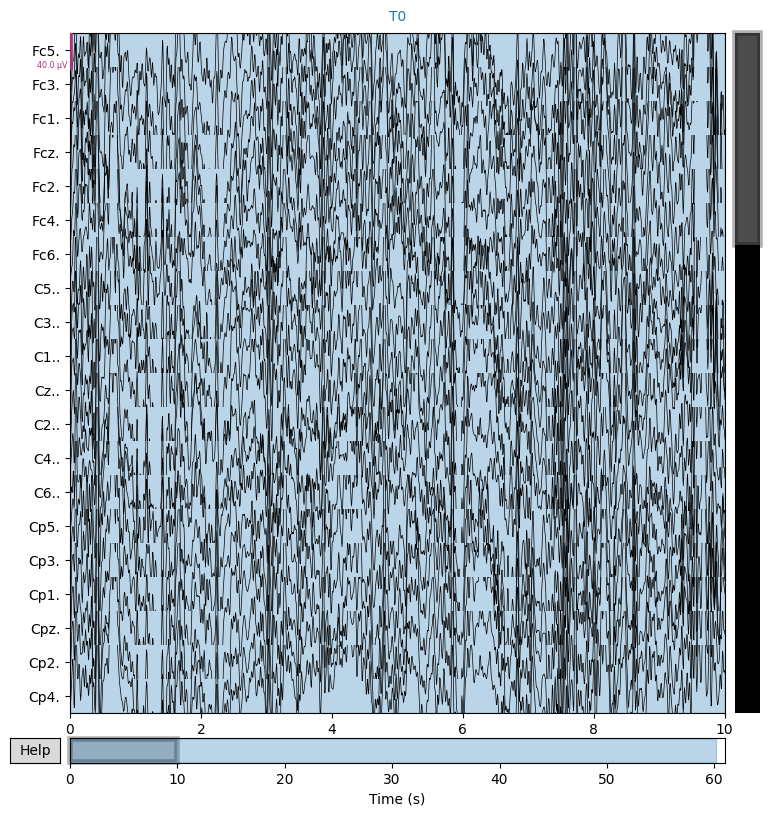

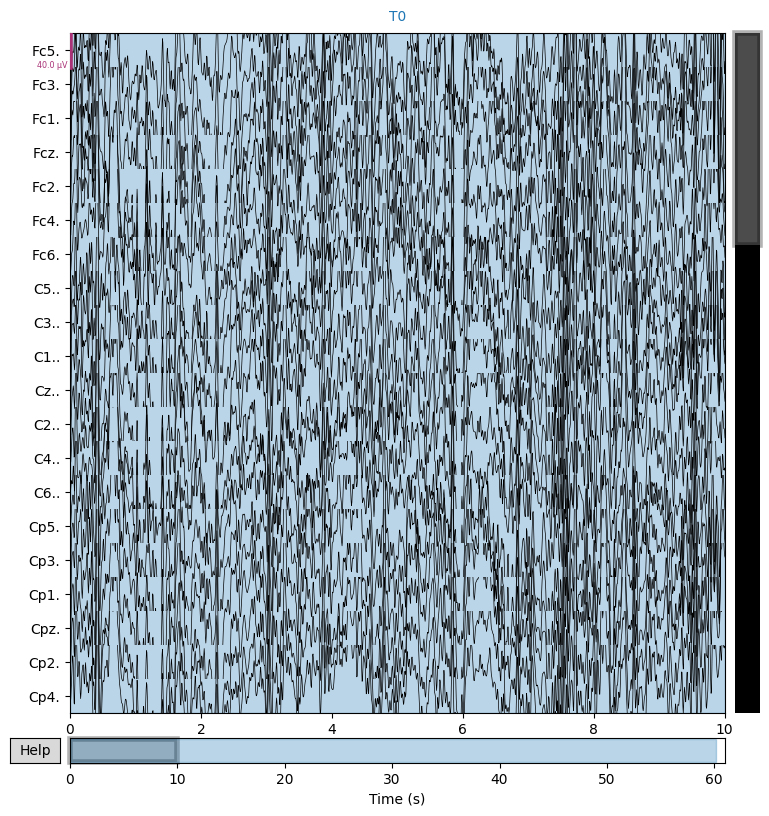

In [46]:
raw = mne.io.read_raw_edf("../datasets/S001R01.edf")
clean(raw)

In [37]:
# Filter settings
low_cut = 0.1 
ica_low_cut = 1.0 

hi_cut  = 30

# ICA settings
seed = 42
ica_n_components = .99

# EOG Channel names
# Assume channels are close enough to the eyes to act as EOG channels
EOG_ch_names = ['Fp1.','Fp2.']

In [ ]:
# Normalize, filter, and reject artefacts from data
def clean(raw):
    raw.load_data()

    # Normalize the input data

    # Regular filter in the 0.1-30hz range
    raw = raw.filter(low_cut, hi_cut)

    # ICA based artefact rejection
    run_ICA(raw,use_autoreject=True)


def run_ICA(data, use_autoreject=False): 

    # Heavy highpass for ICA training data
    train_data = raw.copy().filter(ica_low_cut, None)

    ica = mne.preprocessing.ICA(n_components=ica_n_components,
                                random_state=seed,
                                )

    # Autoreject epoch extraction
    if use_autoreject:
        train_data = do_autoreject(train_data)
    
    ica.fit(train_data)

    # Use EOG signal to eliminate eye blink
    
    eog_indices, _ = ica.find_bads_eog(raw,EOG_ch_names)
    ica.exclude = eog_indices

    # Try to find muscle artefacts

    muscle_indices, _ = ica.find_bads_muscle(raw)
    ica.exclude.extend(muscle_indices)


    # Reconstruct data
    reconst_raw = raw.copy()
    ica.apply(reconst_raw)

    raw.plot()
    plt.show()

    reconst_raw.plot()
    plt.show()

# Applies autoreject to prevent large artefacts from affecting the ICA training
def do_autoreject(train_data):
    # Break data into 1 s epochs
        tstep = 1.0
        events_ica = mne.make_fixed_length_events(train_data, duration=tstep)
        epochs_ica = mne.Epochs(train_data, events_ica,
                                tmin=0.0, tmax=tstep,
                                baseline=None,
                                preload=True)
        

        
        ar = AutoReject(n_interpolate=[1, 2, 4],
                    random_state=42,
                    picks=mne.pick_types(epochs_ica.info, 
                                        eeg=True,
                                        eog=False
                                        ),
                    n_jobs=-1, 
                    verbose=False
                    )

        ar.fit(epochs_ica)

        reject_log = ar.get_reject_log(epochs_ica)
        return epochs_ica[~reject_log.bad_epochs]


Failed: ./datasets/2_FA/2_FA_0.csv


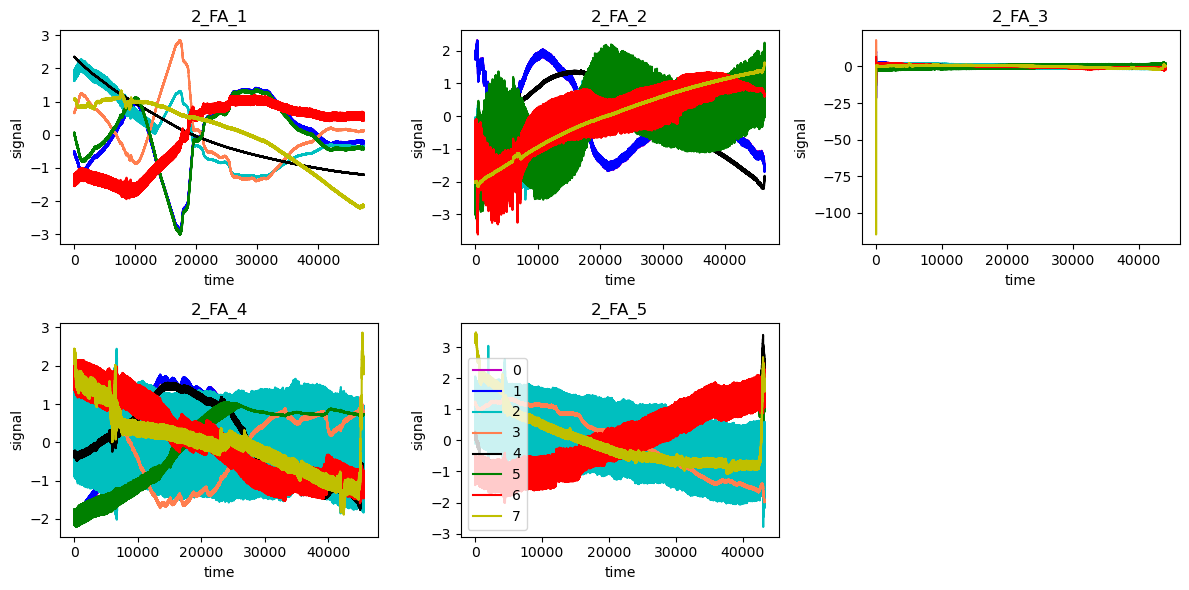

In [110]:
plot_all('2_FA', 8)